In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
with open('./data/lab1/kroB100.txt') as f:
    data = f.read()
data = data.split('\n')
data = pd.DataFrame([i.split(' ') for i in data])
data = data.drop(0, axis=1)
data = data.drop(100, axis=0)

print(data.head())

      1     2
0  1380   939
1  2848    96
2  3510  1671
3   457   334
4  3888   666


In [169]:
def distance(a, b):
    return round(np.sqrt(( a[0] - b[0])**2 + (a[1]) - b[1])**2)

points_matrix = data.to_numpy()
matrix = []
for i in range(100):
    matrix.append([])
    for j in range(100):
        matrix[i].append(points_matrix[i,:].astype(int) - points_matrix[j,:].astype(int))
matrix = np.array(matrix)

distance_matrix = np.sqrt(np.square(matrix[:,:,0]) + np.square(matrix[:,:,1]))
distance_matrix.shape

for i in range(distance_matrix.shape[0]):
    distance_matrix[i,i] = np.inf


In [170]:
points_matrix = points_matrix.astype(int)
def plot_results(cycles):
    plt.scatter(points_matrix[..., 0], points_matrix[..., 1])
    plt.plot(points_matrix[cycles[0], 0], points_matrix[cycles[0], 1], 'r')
    plt.plot(points_matrix[cycles[1], 0], points_matrix[cycles[1], 1], 'g')
    plt.show()

Agorytm zachłanny

In [171]:
def solve_nearest_neighbour(distance_matrix):
    remaining = [i for i in range(100)]
    x = np.random.choice(remaining)
    first_cycle = [x]
    remaining.remove(x)
    ind = np.argpartition(distance_matrix[x,:], -2)[-2:]
    second_x = ind.tolist()
    second_x.remove(x)
    second_x = second_x[0]
    second_cycle = [second_x]
    remaining.remove(second_x)

    cycles = [first_cycle, second_cycle]

    while remaining:
        for cycle in cycles:
            min_node = remaining[np.argmin(distance_matrix[cycle[-1]][remaining])]
            cycle.append(min_node)
            remaining.remove(min_node)
    for cycle in cycles:
        cycle.append(cycle[0])
    return cycles

34836.010535062254


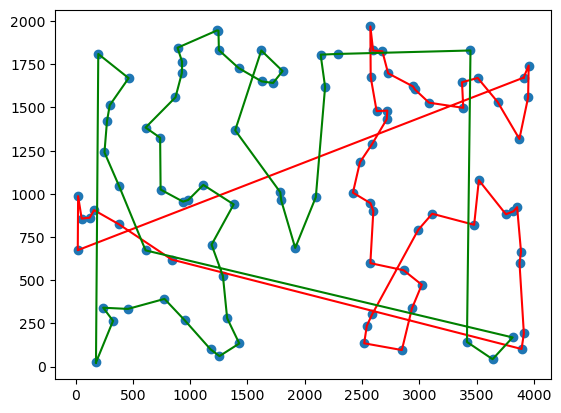

In [173]:
def calc_distance_sum(cycle, distance_matrix):
    suma = 0
    for i in range(1,len(cycle)):
        suma += distance_matrix[cycle[i-1], cycle[i]]
    return suma

cycles = solve_nearest_neighbour(distance_matrix)


print(calc_distance_sum(cycles[0], distance_matrix) + calc_distance_sum(cycles[1], distance_matrix))
plot_results(cycles)
                      
            

In [174]:
def solve_cycle(distance_matrix):
    remaining = [i for i in range(100)]
    x = np.random.choice(remaining)
    first_cycle = [x]
    remaining.remove(x)
    ind = np.argpartition(distance_matrix[x,:], -2)[-2:]
    second_x = ind.tolist()
    second_x.remove(x)
    second_x = second_x[0]
    second_cycle = [second_x]
    remaining.remove(second_x)

    cycles = [first_cycle, second_cycle]

    for cycle in cycles:
        min_node = remaining[np.argmin(distance_matrix[cycle[-1]][remaining])]
        cycle.append(min_node)
        remaining.remove(min_node)

    while remaining:
        for cycle in cycles:
            cycle.append(cycle[0])
            best_node = None
            lowest_distance_increase = np.inf
            best_index = None

            for i in range(len(cycle) - 1):  # gdzie wsadzic
                for remaining_node in remaining: # co wsadzic
                    distance_increase = distance_matrix[cycle[i]][remaining_node] + distance_matrix[remaining_node][cycle[i+1]] - distance_matrix[cycle[i]][cycle[i+1]]
                    if distance_increase < lowest_distance_increase:
                        lowest_distance_increase = distance_increase
                        best_node = remaining_node
                        best_index = i

            cycle.insert(best_index + 1, best_node)
            # plot_results(cycles)
            remaining.remove(best_node)
            cycle.pop()

    for cycle in cycles:
        cycle.append(cycle[0])
    return cycles

28894.875224309944


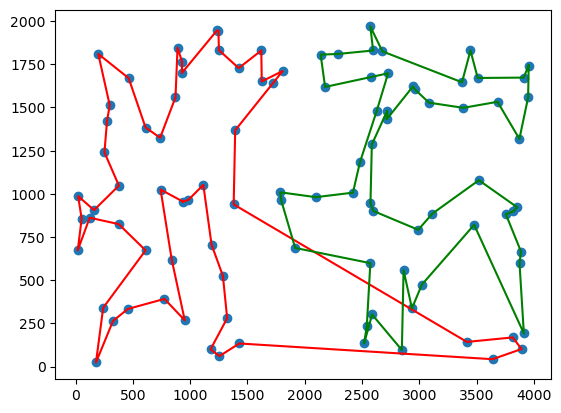

In [175]:
cycles = solve_cycle(distance_matrix)
print(calc_distance_sum(cycles[0], distance_matrix) + calc_distance_sum(cycles[1], distance_matrix))
plot_results(cycles)

In [88]:
first_cycle.append(42)
second_cycle.append(12)

In [176]:
def solve_regret(distance_matrix):
    remaining = [i for i in range(100)]
    x = np.random.choice(remaining)
    first_cycle = [x]
    remaining.remove(x)
    ind = np.argpartition(distance_matrix[x,:], -2)[-2:]
    second_x = ind.tolist()
    second_x.remove(x)
    second_x = second_x[0]
    second_cycle = [second_x]
    remaining.remove(second_x)

    cycles = [first_cycle, second_cycle]

    for cycle in cycles:
        min_node = remaining[np.argmin(distance_matrix[cycle[-1]][remaining])]
        cycle.append(min_node)
        remaining.remove(min_node)

    while remaining:
        for cycle in cycles:
            cycle.append(cycle[0])
            best_node = None
            best_index = None
            distance_increases = np.zeros((len(remaining), len(cycle)-1))
            for i in range(len(cycle) - 1):  # gdzie wsadzic
                for j in range(len(remaining)): # co wsadzic
                    remaining_node = remaining[j]
                    distance_increases[j,i] = distance_matrix[cycle[i]][remaining_node] + distance_matrix[remaining_node][cycle[i+1]] - distance_matrix[cycle[i]][cycle[i+1]]

            if(len(cycle) - 1 == 2):
                two_lowest = distance_increases
            else:
                two_lowest = np.partition(distance_increases, 2)#[:,:2]
            two_regrets = two_lowest[:,1] - two_lowest[:,0]
            lowest_regret = np.argmax(two_regrets)
            lowest_regret_node = remaining[lowest_regret]
            lowest_regret_index = np.argmin(distance_increases[lowest_regret,:])
            cycle.insert(lowest_regret_index + 1, lowest_regret_node)
            remaining.remove(lowest_regret_node)
            cycle.pop()

    for cycle in cycles:
        cycle.append(cycle[0])
    return cycles

33507.478701310596


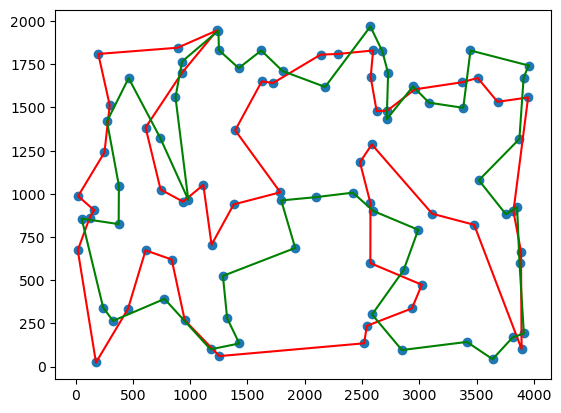

In [185]:
cycles = solve_regret(distance_matrix)
print(calc_distance_sum(cycles[0], distance_matrix) + calc_distance_sum(cycles[1], distance_matrix))
plot_results(cycles)